In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams.update({'font.size': 16})

In [229]:
df = pd.read_csv('files/cleaned_re_data_full.csv')

In [230]:
df['rooms'] = df['rooms'].map(lambda d: str(d).split('.')[0])
df['floor'] = df['floor'].map(lambda d: str(d).split('.')[0])

In [231]:
df.head(5)

,title,description,posted_date,price,partitioning,surface,floor,rooms,terrace,parking,cellar,source_offer,neighborhood,posted_date_month,price_sqm
0,"inchiriere studio, centru",capital imobiliare va propune spre inchiriere un studio situat in ...,2019-09-27,600.0,semidecomandat,30.0,1,1,False,False,False,real estate agency,centru,9,20.000000
1,apartament 3 camere mobilat utilat mihai viteazu,oferim spre inchiriere aprtament cu 3 camere situat in zona buleva...,2019-08-20,350.0,decomandat,70.0,5,3,False,True,False,unknown,centru,8,5.000000
2,apartament 2 camere zona calea dumbravi,apartament 2 camere decomandat de inchiriat in sibiu zona calea du...,2019-08-20,300.0,decomandat,56.0,1,2,False,False,False,unknown,not found,8,5.357143
3,"apartament 2 camere, 70 mp, semidecomandat, zona ultracentrala",blitz ofera spre inchiriere apartament cu 2 camere semidecomandate...,2019-08-28,550.0,NaN,70.0,1,2,False,False,False,unknown,centru,8,7.857143
4,chirie 2 camere gheorgheni,"inchiriez de la 1 octombrie apartament 2 camere, parter, strada he...",2019-09-23,400.0,semidecomandat,48.0,nan,2,False,False,False,owner,gheorgheni,9,8.333333


In [232]:
# Some averages
data = [[df['price'].mean(), df['price_sqm'].mean(), df['surface'].mean()]]
df_avg = pd.DataFrame(
    data, columns=["Average price", "Average price/sqm", "Average surface"])
df_avg.style.hide_index()

Average price,Average price/sqm,Average surface
479.122,8.35283,59.3563


In [233]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 16})

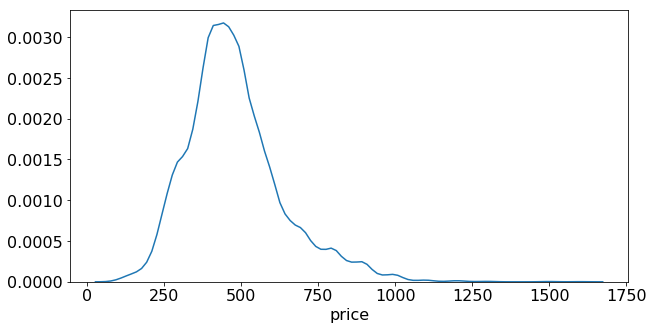

In [234]:
# Let's check out the price distribution
price_distrib_plot = sb.distplot(df["price"], hist=False);

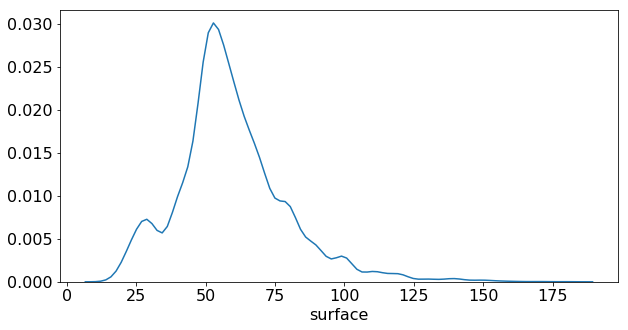

In [235]:
sb.distplot(df["surface"], hist=False);

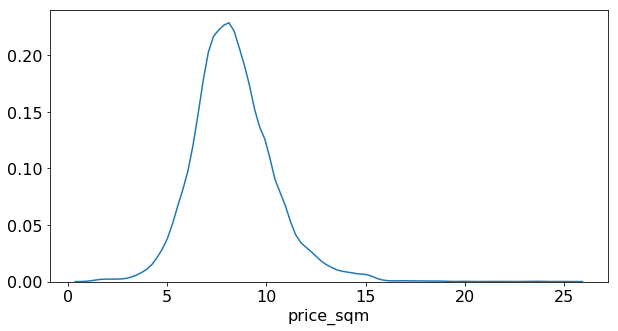

In [236]:
sb.distplot(df["price_sqm"], hist=False);

In [237]:
df['month'] = df['posted_date_month']

,price
month,
4,435.550396
5,427.494703
6,458.311648
7,482.474896
8,474.802363
9,491.614517


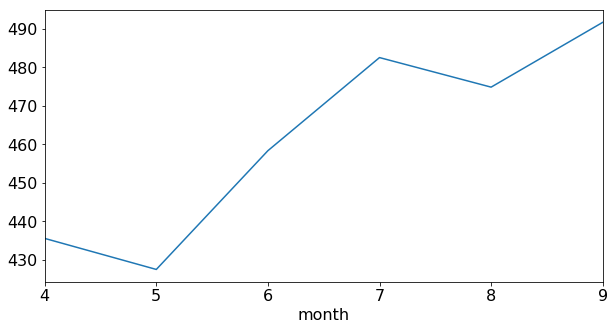

In [238]:
df_avg_month_grouped = df.groupby('month').mean()['price']
avg_price_month_plot = df_avg_month_grouped.plot()
pd.DataFrame(df_avg_month_grouped)

In [239]:
temp_df = df.drop('rooms', 1)
temp_df = temp_df.drop('terrace', 1)
temp_df = temp_df.drop('parking', 1)
temp_df = temp_df.drop('cellar', 1)
temp_df = temp_df.drop('month', 1)
temp_df = temp_df.drop('posted_date_month', 1)

In [240]:
# Average prices for top 3 most expensive, least expensive
avg_price_areas = temp_df.groupby('neighborhood').mean().sort_values(
    by='price', ascending=False)
top3 = avg_price_areas[:3]
bottom3 = avg_price_areas[-3:]

In [241]:
pd.DataFrame(top3)

,price,surface,price_sqm
neighborhood,,,
plopilor,549.511450,69.709924,8.135992
centru,534.836963,60.090455,9.154423
borhanci,527.354167,70.666667,7.682061


In [242]:
pd.DataFrame(bottom3)

,price,surface,price_sqm
neighborhood,,,
baciu,341.214294,57.509804,6.065305
floresti,308.685176,57.850299,5.505890
gruia,306.133333,37.233333,9.056019


In [243]:
temp_df = df.drop('terrace', 1)
temp_df = temp_df.drop('parking', 1)
temp_df = temp_df.drop('cellar', 1)
temp_df = temp_df.drop('posted_date_month', 1)
temp_df = temp_df.drop('surface', 1)

avg_price_rooms = temp_df.groupby('rooms').mean().sort_values(by='rooms')
pd.DataFrame(avg_price_rooms)

,price,price_sqm,month
rooms,,,
1,308.028236,9.757377,8.404094
2,447.774763,8.368441,7.972419
3,569.002440,7.863313,8.045821
4,722.087049,7.405976,8.323625
5,787.000000,6.548887,8.400000


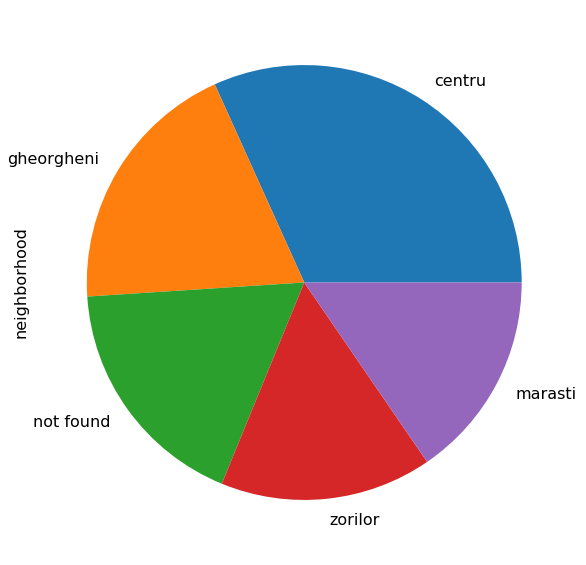

In [244]:
df_partial = df['neighborhood'].value_counts()[:5]
chart = df_partial.plot.pie(figsize=(10, 10))

In [245]:
def get_field_count_mapping(dataframe, field, limit=0):
    sizes = list(
        dataframe.groupby(field).count().sort_values(by=field)['title']
    )
    labels = sorted(dataframe[field].unique())
    sizes, labels = list(zip(*sorted(zip(sizes, labels))))
    sizes, labels = sizes[::-1], labels[::-1]
    if limit > 0:
        sizes, labels = sizes[:limit] + (sum(map(lambda x: int(x),sizes[limit:])), ), labels[:limit] + ('others', )

    return sizes, labels

def build_piechart(sizes, labels):
    fig, ax = plt.subplots(figsize=(10, 8))
    fig.subplots_adjust(0.3, 0, 1, 1)
    ax.pie(sizes, startangle=90)
    total = sum(sizes)
    plt.legend(
        loc='upper left',
        labels=[
            '%s, %.2f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)
        ],
        bbox_to_anchor=(0.0, 1),
        bbox_transform=fig.transFigure
    )
    return plt

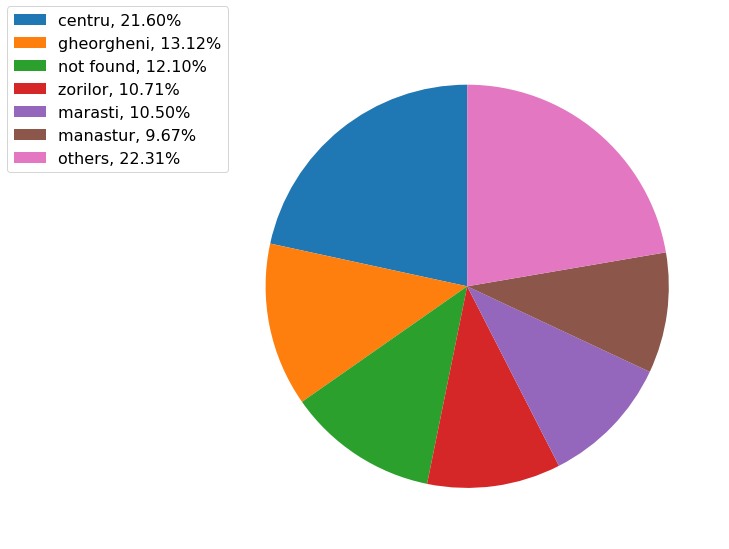

In [246]:
s, l = get_field_count_mapping(df, 'neighborhood', limit=6)
chart = build_piechart(s, l)
chart.show()

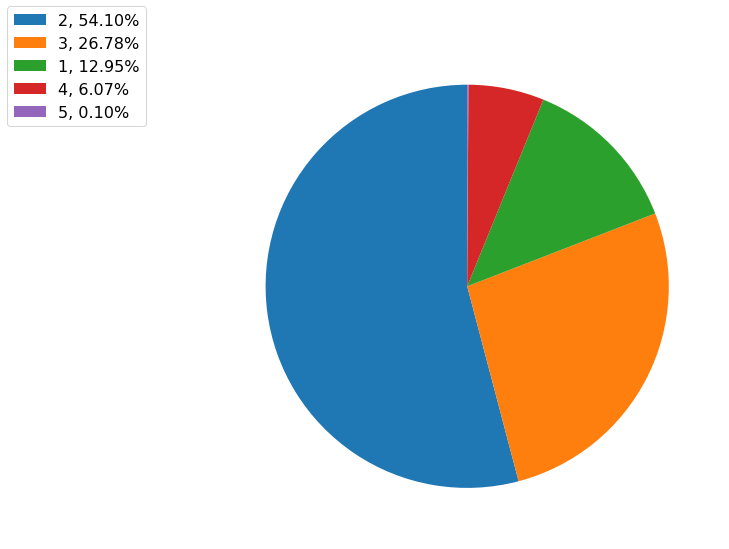

In [247]:
s, l = get_field_count_mapping(df, 'rooms')
chart = build_piechart(s, l)
chart.show()

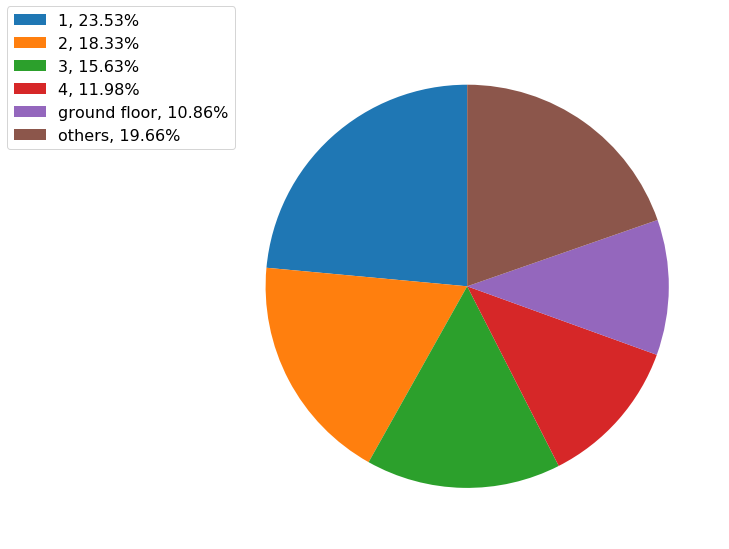

In [248]:
temp_df_floor = df[df['floor'] != 'nan']
s, l = get_field_count_mapping(temp_df_floor, 'floor', 5)
chart = build_piechart(s, l)
chart.show()

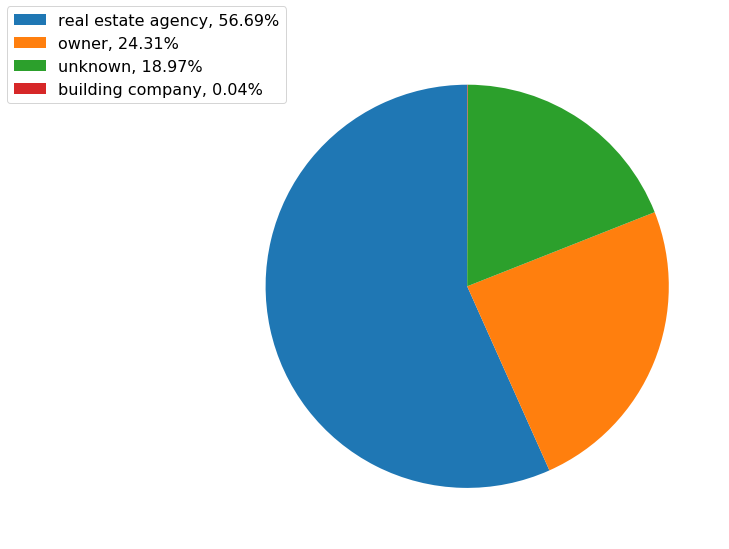

In [249]:
temp_df_so = df[pd.notnull(df['source_offer'])]
s, l = get_field_count_mapping(temp_df_so, 'source_offer')
chart = build_piechart(s, l)
chart.show()

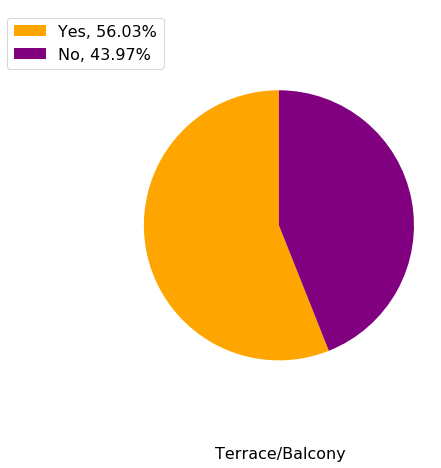

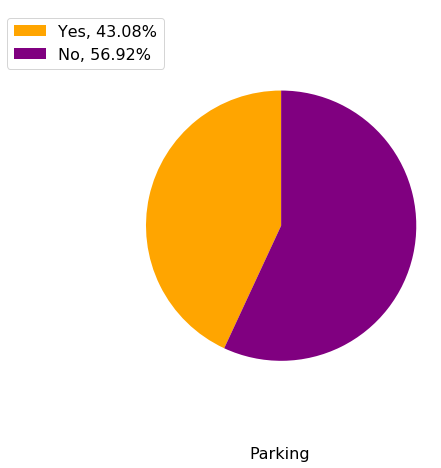

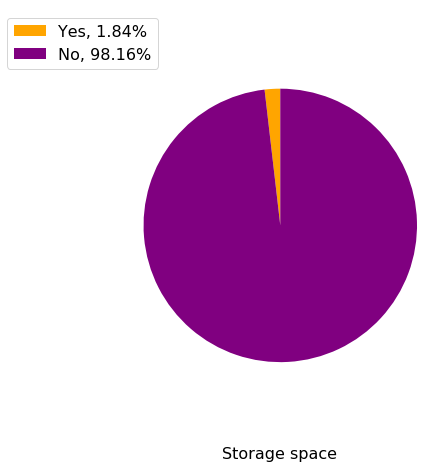

In [250]:
yesno_map = {True: 'Yes', False: 'No'}
yesno_map_color = {'Yes': 'orange', 'No': 'purple'}

def build_piechart_yesno(sizes, labels, title):
    labels = [yesno_map.get(mapped_bool) for mapped_bool in labels]
    
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    fig1.subplots_adjust(0.3, 0, 1, 1)
    _, _ = ax1.pie(sizes, startangle=90, colors=[yesno_map_color.get(lbl) for lbl in labels])
    ax1.axis('equal')
    total = sum(sizes)
    plt.legend(
        loc='upper left',
        labels=['%s, %.2f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
        bbox_to_anchor=(0.0, 1),
        bbox_transform=fig1.transFigure,
    )
    plt.xlabel(title)
    return plt

temp_df_so = df[pd.notnull(df['terrace'])]
s, l = get_field_count_mapping(temp_df_so, 'terrace')
chart = build_piechart_yesno(s, l, title="Terrace/Balcony")
chart.show()

temp_df_so = df[pd.notnull(df['parking'])]
s, l = get_field_count_mapping(temp_df_so, 'parking')
chart = build_piechart_yesno(s[::-1], l[::-1], title='Parking')
chart.show()

temp_df_so = df[pd.notnull(df['cellar'])]
s, l = get_field_count_mapping(temp_df_so, 'cellar')
chart = build_piechart_yesno(s[::-1], l[::-1], title="Storage space")
chart.show()

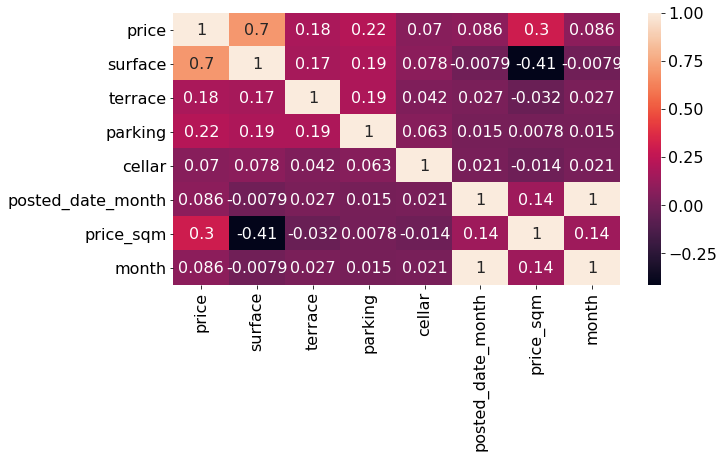

In [251]:
sb.heatmap(df.corr(), annot=True)

In [252]:
my_price = 420
my_surface = 65
my_rooms = 3
my_area = 'gheorgheni'
my_sqm = my_price / my_surface
print(my_sqm)

6.461538461538462


In [264]:
df3 = df.loc[df.rooms == '3']

In [265]:
df3.shape

(2728, 16)

In [266]:
# Some averages
df3['price'].mean(), df3['price_sqm'].mean()

(569.0024404875521, 7.863313145300338)

In [256]:
df3gh = df3.loc[df3.neighborhood == 'gheorgheni']

In [257]:
df3gh['price'].mean(), df3gh['price_sqm'].mean(), df3gh['surface'].mean()

(581.6282023657589, 8.239473022874527, 71.21895424836602)

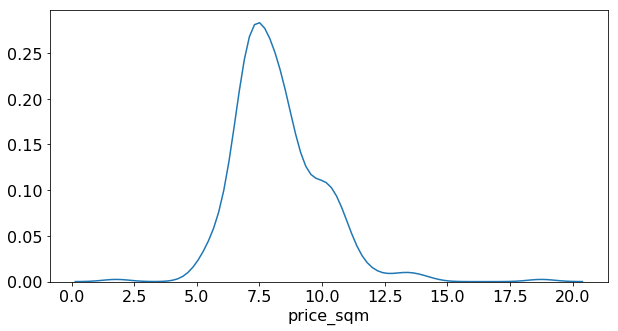

In [258]:
sb.distplot(df3gh["price_sqm"], hist=False);

In [259]:
df3gh.shape

(306, 16)

In [260]:
df3ghp = df3gh.loc[df3gh.price < 450]

In [261]:
df3ghp.shape

(23, 16)

In [262]:
df3ghp.shape[0]/df.shape[0]

0.002258001178087571